In [1]:
import os
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer
import difflib
import folium
from random import sample
import datetime as dt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import sys
#!{sys.executable} -m pip install linearmodels

In [2]:
# skip reading
postcodecsv = pd.read_csv('au_postcodes.csv') 
import pandas as pd
from statistics import median
from statistics import mean
from scipy import stats

ndf = pd.read_json('POA_2016_AUST.json')
ndf1 = ndf['features'].apply(pd.Series)
ndf2 = ndf1['geometry'].apply(pd.Series)
ndf3 = ndf1['properties'].apply(pd.Series)
border = ndf2['coordinates']

depth = lambda L: isinstance(L, list) and max(map(depth, L))+1

def flatten(d, l=1):
    for i in d:
        yield from ([i] if l == 1 else flatten(i, l-1))

def centerlocation(index):
    tmplst = list(flatten(border[index], l= depth(border[index])))
    longi = median([i for i in tmplst  if i > 0])
    lati = median([i for i in tmplst  if i < 0])
    return[longi,lati]

postcodedf = []
i = 0
for i in range(len(ndf)):
    if depth(border[i])>0:
        tpd = {
        'postcode':[ndf3['POA_CODE16'].iloc[i]],
        'longitude':[centerlocation(i)[0]],
        'latitude':[centerlocation(i)[1]]}
        tpdf = pd.DataFrame(tpd)
        postcodedf.append(tpdf)
    else:
        print(i)
        continue
    i = i+1
postcodedf = pd.concat(postcodedf,ignore_index=True)


2668
2669


In [3]:
# skip reading
data =  pd.read_csv('./markettrends0.csv', dtype = {'state': 'str', 'sa3_name16': 'str','sa4_name16': 'str',
                                                   'postcode': 'str','state': 'str','property_type':'str'})
data['value_at_date']= pd.to_datetime(data['value_at_date'])
data['value_at_date'] = data['value_at_date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
data.head(15)
ndata = data.fillna({'Volume of new rental listings (1 month)': 0, 'Volume of sales (1 month)': 0}).dropna(subset = ['postcode'])
ndatahouses = ndata[:][ndata.property_type == 'Houses']
ndataunits = ndata[:][ndata.property_type == 'Units']


In [ ]:
# skip reading
UniquePostcode = ndatahouses.postcode.unique()[:]
DataFrameDict_postcode = {elem : pd.DataFrame for elem in UniquePostcode}
for key in DataFrameDict_postcode.keys():
    DataFrameDict_postcode[key] = ndatahouses[:][ndatahouses.postcode == key]

In [ ]:
aveHPI = []
lst = ['postcode', 'date', 'logHPI','logHPIdiff']
# Calling DataFrame constructor on list  
for key in DataFrameDict_postcode.keys():
    df = pd.DataFrame([], columns = lst)  
    df['Description'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'1990-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'1990-12')])
    df['postcode'] = key
    df['logHPIdiff'] = df['logHPI'].diff(1)
    aveHPI.append(df)
    
aveHPIdf = pd.concat(aveHPI)
aveHPIdf = aveHPIdf.reset_index(drop =True)

In [ ]:
agg = aveHPIdf.groupby('Description')['logHPIdiff'].agg(['mean']).reset_index()
agg.dropna()

In [8]:
# skip reading
xls1 = pd.read_excel("f01hist.xls",sheet_name='Data',header = 2)
xls1 = xls1.drop(xls1.index[0:8],axis = 0)
xls1['Description'] = pd.to_datetime(xls1['Description'])
xls1['Description'] = xls1['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls3 = pd.read_excel("f11hist-1969-2009.xls",sheet_name='Data',header = 2)
xls3 = xls3.drop(xls3.index[0:8],axis = 0)
xls3['Description'] = pd.to_datetime(xls3['Description'])
xls3['Description'] = xls3['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls4 = pd.read_excel("f11hist.xls",sheet_name='Data',header = 2)
xls4 = xls4.drop(xls4.index[0:8],axis = 0)
xls4['Description'] = pd.to_datetime(xls4['Description'])
xls4['Description'] = xls4['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls34 = pd.concat([xls3, xls4], axis=0)
xls5 = pd.read_excel("g01hist.xls",sheet_name='Data',header = 2)
xls5 = xls5.drop(xls5.index[0:8],axis = 0)
xls5['Description'] = pd.to_datetime(xls5['Description'])
xls5['Description'] = xls5['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls6 = pd.read_excel("h01hist.xls",sheet_name='Data',header = 2)
xls6 = xls6.drop(xls6.index[0:8],axis = 0)
xls6['Description'] = pd.to_datetime(xls6['Description'])
xls6['Description'] = xls6['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
xls7 = pd.read_excel("h03hist.xls",sheet_name='Data',header = 2)
xls7 = xls7.drop(xls7.index[0:8],axis = 0)
xls7['Description'] = pd.to_datetime(xls7['Description'])
xls7['Description'] = xls7['Description'].dt.date.apply(lambda x: x.strftime('%Y-%m'))


In [289]:
# skip reading
macvar = pd.DataFrame().assign(Description = xls7.loc[('2021-06'>xls7['Description']) & (xls7['Description']>'1999-12')]['Description'])
macvar.reset_index(drop =True, inplace = True)

macvar = pd.merge(macvar,xls1[['Description','Cash Rate Target; monthly average']],on='Description', how='left')
macvar = pd.merge(macvar,xls34[['Description','AUD/USD Exchange Rate; see notes for further detail.']],on='Description', how='left')
macvar = pd.merge(macvar,xls5[['Description','Consumer price index; All groups']],on='Description', how='left')
macvar = pd.merge(macvar,xls6[['Description','Gross domestic product (GDP); Chain volume']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Retail sales; All industries; Current price']],on='Description', how='left')
macvar = pd.merge(macvar,xls7[['Description','Private dwelling approvals']],on='Description', how='left')

macvar = macvar.set_axis(['date','ir', 'exr', 'cpi', 'gdp', 'rs','pda'], axis=1, inplace=False)
macvar['ir'] = macvar['ir'].astype(float, errors = 'raise') 
macvar['exr'] = macvar['exr'].astype(float, errors = 'raise')
macvar['cpi'] = macvar['cpi'].astype(float, errors = 'raise')
macvar['gdp'] = macvar['gdp'].astype(float, errors = 'raise')
macvar['rs'] = macvar['rs'].astype(float, errors = 'raise')
macvar['pda'] = macvar['pda'].astype(float, errors = 'raise')
macvar = macvar.interpolate()
macvarst = macvar


lag = [1,2,3,4,5,6,7,8,9,10,11,12]
threshold = 0.01
for i in lag:
    if adfuller(macvar['ir'].pct_change(i).dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}'] = macvar['ir'].pct_change(i)  
    if adfuller(macvar['ir'].pct_change(i).diff().dropna(how = 'all') )[1]<threshold:
        macvarst[f'ir{i}_2'] = macvar['ir'].pct_change(i).diff()  
        
    if adfuller(macvar['exr'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}'] = macvar['exr'].pct_change(i)
    if adfuller(macvar['exr'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'exr{i}_2'] = macvar['exr'].pct_change(i).diff()    
        
    if adfuller(macvar['cpi'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}'] = macvar['cpi'].pct_change(i)
    if adfuller(macvar['cpi'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'cpi{i}_2'] = macvar['cpi'].pct_change(i).diff()
        
    if adfuller(macvar['gdp'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}'] = macvar['gdp'].pct_change(i)
    if adfuller(macvar['gdp'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'gdp{i}_2'] = macvar['gdp'].pct_change(i).diff() 
        
    if adfuller(macvar['rs'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}'] = macvar['rs'].pct_change(i)
    if adfuller(macvar['rs'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff() 
        
    if adfuller(macvar['pda'].pct_change(i).dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}'] = macvar['pda'].pct_change(i)
    if adfuller(macvar['pda'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
        macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()     
 

In [ ]:
# # skip reading
# macvar = pd.DataFrame().assign(Description = xls7.loc[('2021-06'>xls7['Description']) & (xls7['Description']>'1999-12')]['Description'])
# macvar.reset_index(drop =True, inplace = True)

# macvar = pd.merge(macvar,xls1[['Description','Cash Rate Target; monthly average']],on='Description', how='left')
# macvar = pd.merge(macvar,xls34[['Description','AUD/USD Exchange Rate; see notes for further detail.']],on='Description', how='left')
# macvar = pd.merge(macvar,xls5[['Description','Consumer price index; All groups']],on='Description', how='left')
# macvar = pd.merge(macvar,xls6[['Description','Gross domestic product (GDP); Chain volume']],on='Description', how='left')
# macvar = pd.merge(macvar,xls7[['Description','Retail sales; All industries; Current price']],on='Description', how='left')
# macvar = pd.merge(macvar,xls7[['Description','Private dwelling approvals']],on='Description', how='left')
# macvar = pd.merge(macvar,agg[['Description','mean']],on='Description', how='left')

# macvar = macvar.set_axis(['date','ir', 'exr', 'cpi', 'gdp', 'rs','pda','loghpidiff'], axis=1, inplace=False)
# macvar['ir'] = macvar['ir'].astype(float, errors = 'raise') 
# macvar['exr'] = macvar['exr'].astype(float, errors = 'raise')
# macvar['cpi'] = macvar['cpi'].astype(float, errors = 'raise')
# macvar['gdp'] = macvar['gdp'].astype(float, errors = 'raise')
# macvar['rs'] = macvar['rs'].astype(float, errors = 'raise')
# macvar['pda'] = macvar['pda'].astype(float, errors = 'raise')
# macvar['loghpidiff'] = macvar['loghpidiff'].astype(float, errors = 'raise')
# macvar = macvar.interpolate()
# macvarst = macvar


# lag = [1,2,3,4,5,6,7,8,9,10,11,12]
# threshold = 0.01
# for i in lag:
#     if adfuller(macvar['ir'].pct_change(i).dropna(how = 'all') )[1]<threshold:
#         macvarst[f'ir{i}'] = macvar['ir'].pct_change(i)  
#     if adfuller(macvar['ir'].pct_change(i).diff().dropna(how = 'all') )[1]<threshold:
#         macvarst[f'ir{i}_2'] = macvar['ir'].pct_change(i).diff()  
        
#     if adfuller(macvar['exr'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'exr{i}'] = macvar['exr'].pct_change(i)
#     if adfuller(macvar['exr'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'exr{i}_2'] = macvar['exr'].pct_change(i).diff()    
        
#     if adfuller(macvar['cpi'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'cpi{i}'] = macvar['cpi'].pct_change(i)
#     if adfuller(macvar['cpi'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'cpi{i}_2'] = macvar['cpi'].pct_change(i).diff()
        
#     if adfuller(macvar['gdp'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'gdp{i}'] = macvar['gdp'].pct_change(i)
#     if adfuller(macvar['gdp'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'gdp{i}_2'] = macvar['gdp'].pct_change(i).diff() 
        
#     if adfuller(macvar['rs'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'rs{i}'] = macvar['rs'].pct_change(i)
#     if adfuller(macvar['rs'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'rs{i}_2'] = macvar['rs'].pct_change(i).diff() 
        
#     if adfuller(macvar['pda'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'pda{i}'] = macvar['pda'].pct_change(i)
#     if adfuller(macvar['pda'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'pda{i}_2'] = macvar['pda'].pct_change(i).diff()     
    
#     if adfuller(macvar['loghpidiff'].pct_change(i).dropna(how = 'all'))[1]<threshold:
#         macvarst[f'loghpidiff{i}'] = macvar['loghpidiff'].pct_change(i)
#     if adfuller(macvar['loghpidiff'].pct_change(i).diff().dropna(how = 'all'))[1]<threshold:
#         macvarst[f'loghpidiff{i}_2'] = macvar['loghpidiff'].pct_change(i).diff()   
            
# macvarst['loghpidiff'] = macvar['loghpidiff']   

In [290]:
from sklearn.preprocessing import PolynomialFeatures
# skip reading
macvarsta = macvarst[macvarst.columns.difference(['ir','exr','cpi','gdp','rs','pda'])]
# macvarsta = macvarst[macvarst.columns.difference(['ir','exr','cpi','gdp','rs','pda','loghpidiff'])]
matrixmac = macvarsta.corr().round(2)
macdata = macvarsta.loc[('2019-12'> macvarsta['date']) & (macvarsta['date']>'2001-12')]

pca =PCA()
X_train = macdata.loc[:, macdata.columns != 'date']
trans = PolynomialFeatures(degree=2)
X_train_extended = trans.fit_transform(X_train)
pca.fit(X_train_extended)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

pca_d =  PCA(n_components=d)
pca_d.fit(X_train)
X_pca_d = pca_d.transform(X_train)
PCnames = []
for i in range(1,d+1,1):
    PCnames.append(f'PC{i}')    
pcadf = pd.DataFrame(X_pca_d,columns = PCnames)

21


In [72]:
pca_avg=pd.concat([pcadf,agg['mean'].loc[('2019-12'>agg['Description']) & (agg['Description']>'2001-12')].reset_index(drop = True)],axis=1)
# skip reading
paneldata = []
lst = ['postcode', 'date','logHPI','difflogHPI']
for key in DataFrameDict_postcode.keys():
    df = pd.DataFrame([], columns = lst)  
    df['date'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')])
    df['postcode'] = key
    df['difflogHPI'] = (np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-11')])).diff(1).dropna()
    data = pd.concat([df.reset_index(drop =True),pca_avg], axis=1)
    paneldata.append(data)
paneldf = pd.concat(paneldata,ignore_index=True) 


In [291]:
paneldf

,postcode,date,logHPI,difflogHPI,PC1,PC2,PC3,PC4,PC5,PC6,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,mean
0,0800,2002-01-01,6.566305,-0.044277,0.083400,-0.415140,0.124465,-0.143227,0.047260,0.154555,...,0.001375,0.012510,0.000647,0.000529,-0.000135,-0.007125,-0.003124,0.007552,-0.001875,0.023656
1,0800,2002-02-01,6.615781,0.049476,-0.173294,-0.303858,-0.026490,-0.223945,-0.058730,0.033317,...,-0.000331,-0.005232,-0.000378,0.003438,-0.009891,-0.005186,0.005483,0.008746,0.003763,0.017277
2,0800,2002-03-01,6.637132,0.021351,0.241042,-0.021937,-0.112062,-0.074184,0.027474,0.075253,...,-0.011909,-0.008721,0.004549,0.005859,-0.011520,0.000807,-0.007527,-0.004468,0.009759,0.012545
3,0800,2002-04-01,6.547985,-0.089147,0.344018,-0.149615,-0.046407,0.015106,-0.020306,-0.074621,...,-0.013633,-0.002263,-0.006151,0.006161,0.007103,0.002933,-0.004780,-0.005316,-0.005029,0.016150
4,0800,2002-05-01,6.569620,0.021635,-0.257264,-0.409054,-0.254178,-0.047843,-0.046156,0.128886,...,-0.001944,-0.011023,-0.008253,-0.003190,0.010194,0.002377,0.006623,0.000799,0.000249,0.007504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564800,7470,2019-07-01,6.985018,0.028652,-0.453262,0.257820,0.222531,0.237957,-0.191061,0.232780,...,-0.011297,-0.001337,-0.000189,-0.003030,0.005898,-0.002013,0.005989,-0.002715,0.002292,-0.005289
564801,7470,2019-08-01,6.970598,-0.014419,-0.031342,0.356764,0.009578,-0.078720,0.058894,-0.121134,...,0.009844,-0.003519,0.001141,-0.001963,0.002573,-0.006986,0.003624,-0.003675,0.006332,-0.006170
564802,7470,2019-09-01,6.916741,-0.053858,0.134998,0.225431,-0.042279,0.014264,0.068000,-0.033507,...,-0.001929,0.004605,0.000825,0.002464,-0.002626,-0.001716,-0.000043,-0.002382,-0.002329,0.003032
564803,7470,2019-10-01,6.944083,0.027342,-0.153759,0.163235,0.103032,0.309912,-0.325840,0.123485,...,0.001716,0.000928,-0.001428,-0.002487,-0.006846,-0.000255,-0.004102,0.002193,-0.004712,0.004820


In [74]:
# Panel Data
paneldf['date'] = pd.to_datetime(paneldf['date'])
panelData = paneldf.set_index(['postcode', 'date']) 
panelData

logHPI  difflogHPI       PC1       PC2       PC3  \
postcode date                                                             
0800     2002-01-01  6.566305   -0.044277  0.083400 -0.415140  0.124465   
         2002-02-01  6.615781    0.049476 -0.173294 -0.303858 -0.026490   
         2002-03-01  6.637132    0.021351  0.241042 -0.021937 -0.112062   
         2002-04-01  6.547985   -0.089147  0.344018 -0.149615 -0.046407   
         2002-05-01  6.569620    0.021635 -0.257264 -0.409054 -0.254178   
...                       ...         ...       ...       ...       ...   
7470     2019-07-01  6.985018    0.028652 -0.453262  0.257820  0.222531   
         2019-08-01  6.970598   -0.014419 -0.031342  0.356764  0.009578   
         2019-09-01  6.916741   -0.053858  0.134998  0.225431 -0.042279   
         2019-10-01  6.944083    0.027342 -0.153759  0.163235  0.103032   
         2019-11-01  6.940651   -0.003432  0.225349  0.093130  0.016601   

                          PC4       PC5       PC6       PC7       PC8  ...  \
postcode date                                                          ...   
0800     2002-01-01 -0.143227  0.047260  0.154555  0.093856 -0.134019  ...   
         2002-02-01 -0.223945 -0.058730  0.033317  0.151545  0.073159  ...   
         2002-03-01 -0.074184  0.027474  0.075253 -0.007512  0.119182  ...   
         2002-04-01  0.015106 -0.020306 -0.074621 -0.049472 -0.138415  ...   
         2002-05-01 -0.047843 -0.046156  0.128886 -0.041219 -0.044106  ...   
...                       ...       ...       ...       ...       ...  ...   
7470     2019-07-01  0.237957 -0.191061  0.232780  0.106852 -0.047446  ...   
         2019-08-01 -0.078720  0.058894 -0.121134  0.145623  0.118116  ...   
         2019-09-01  0.014264  0.068000 -0.033507 -0.146146  0.111874  ...   
         2019-10-01  0.309912 -0.325840  0.123485  0.019560 -0.182816  ...   
         2019-11-01 -0.087736  0.092706  0.017209  0.074630 -0.047921  ...   

                         PC41      PC42      PC43      PC44      PC45  \
postcode date                                                           
0800     2002-01-01  0.001375  0.012510  0.000647  0.000529 -0.000135   
         2002-02-01 -0.000331 -0.005232 -0.000378  0.003438 -0.009891   
         2002-03-01 -0.011909 -0.008721  0.004549  0.005859 -0.011520   
         2002-04-01 -0.013633 -0.002263 -0.006151  0.006161  0.007103   
         2002-05-01 -0.001944 -0.011023 -0.008253 -0.003190  0.010194   
...                       ...       ...       ...       ...       ...   
7470     2019-07-01 -0.011297 -0.001337 -0.000189 -0.003030  0.005898   
         2019-08-01  0.009844 -0.003519  0.001141 -0.001963  0.002573   
         2019-09-01 -0.001929  0.004605  0.000825  0.002464 -0.002626   
         2019-10-01  0.001716  0.000928 -0.001428 -0.002487 -0.006846   
         2019-11-01  0.022860 -0.006975  0.003329  0.003401 -0.000155   

                         PC46      PC47      PC48      PC49      mean  
postcode date                                                          
0800     2002-01-01 -0.007125 -0.003124  0.007552 -0.001875  0.023656  
         2002-02-01 -0.005186  0.005483  0.008746  0.003763  0.017277  
         2002-03-01  0.000807 -0.007527 -0.004468  0.009759  0.012545  
         2002-04-01  0.002933 -0.004780 -0.005316 -0.005029  0.016150  
         2002-05-01  0.002377  0.006623  0.000799  0.000249  0.007504  
...                       ...       ...       ...       ...       ...  
7470     2019-07-01 -0.002013  0.005989 -0.002715  0.002292 -0.005289  
         2019-08-01 -0.006986  0.003624 -0.003675  0.006332 -0.006170  
         2019-09-01 -0.001716 -0.000043 -0.002382 -0.002329  0.003032  
         2019-10-01 -0.000255 -0.004102  0.002193 -0.004712  0.004820  
         2019-11-01  0.004132 -0.005130  0.000080 -0.002091  0.013358  

[564805 rows x 52 columns]

In [292]:
PCnames = []
for i in range(1,d+1,1):
    PCnames.append(f'PC{i}')
PCnames.append('mean')
exog =sm.add_constant(panelData[PCnames])
mod = PooledOLS(panelData['difflogHPI'], exog)
pooled_res = mod.fit()
print(pooled_res)

/Users/leiflyu/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/leiflyu/miniforge3/lib/python3.9/site-packages/linearmodels/panel/model.py:855: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PooledOLS Estimation Summary                          
Dep. Variable:             difflogHPI   R-squared:                        0.0480
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:              562655   R-squared (Within):               0.0483
Date:                Thu, May 19 2022   R-squared (Overall):              0.0480
Time:                        20:23:27   Log-likelihood                 1.118e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1290.2
Entities:                        2617   P-value                           0.0000
Avg Obs:                       215.00   Distribution:               F(22,562632)
Min Obs:                       215.00                                           
Max Obs:                       215.00   F-statistic (robust):             1290.2
                            

In [ ]:
residuals_level1  = pooled_res._idiosyncratic
#print(pooled_res.__dict__)
residualsL1 =  residuals_level1.reset_index() 

In [76]:
DataFrameDict_PC = {elem : pd.DataFrame for elem in UniquePostcode}
lst = ['postcode', 'date', 'logHPI','difflogHPI']
# Calling DataFrame constructor on list  
for key in DataFrameDict_PC.keys():
    df = pd.DataFrame([], columns = lst)  
    df['date'] = DataFrameDict_postcode[key]['value_at_date'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')]
    df['logHPI'] = np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-12')])
    df['postcode'] = key
    df['difflogHPI'] = (np.log2(DataFrameDict_postcode[key]['Hedonic Home Value Index'].loc[('2019-12'>DataFrameDict_postcode[key]['value_at_date']) & (DataFrameDict_postcode[key]['value_at_date']>'2001-11')])).diff(1).dropna()
    data = pd.concat([df.reset_index(drop =True),pca_avg], axis=1)
    DataFrameDict_PC[key] = data
     

In [280]:
Rsq = []
for key in DataFrameDict_PC.keys():
    X = DataFrameDict_PC[key].iloc[:, 4:].values
    Y = DataFrameDict_PC[key].iloc[:, 3].values
    X = sm.add_constant(X)
    result = sm.OLS(Y, X).fit()
    Rsq.append(result.rsquared)


/Users/leiflyu/miniforge3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [285]:
from statistics import mean
cleanedRsq = [x for x in Rsq if str(x) != 'nan']
mean(cleanedRsq)

0.3263123650906411

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

df = pd.DataFrame(pca_avg,columns = PCnames)

nobs = 28 # post-covid data is used as the test data set
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size

start_point = df_train.shape[0] 
print(df_train.shape) 
print(df_test.shape) 
model = VAR(df_train)
for i in [1,2,4,5,6]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')



(187, 50)
(28, 50)
Lag Order = 1
AIC :  -607.9269678168943
BIC :  -563.7030214837293
FPE :  1.964838452865159e-264
HQIC:  -590.0057407863828 

Lag Order = 2
AIC :  -680.4862491371368
BIC :  -592.5792387768906
FPE :  2.3055107684277098e-293
HQIC:  -644.8596966534536 

Lag Order = 4
AIC :  -3190.509524192853
BIC :  -3014.2508584220536
FPE :  0.0
HQIC:  -3119.063225840223 

Lag Order = 5
AIC :  -3346.0059576270587
BIC :  -3125.0703316775325
FPE :  0.0
HQIC:  -3256.441869574883 

Lag Order = 6
AIC :  -3386.0867003908697
BIC :  -3120.134322929264
FPE :  0.0
HQIC:  -3278.2639186452716 



In [254]:

model_fitted = model.fit(2)
model_fitted.summary()
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)


for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

lag_order = model_fitted.k_ar    
forecast_input = df_train.values[-lag_order:]

df_forecast = []
for i in range(1,nobs+1,1):
    forecast_input = df.values[-lag_order+start_point+i-1:start_point+i-1,]
    df_forecast.append(model_fitted.forecast(y=forecast_input, steps=1)[0,][-1])

    
df_results = pd.DataFrame(df_forecast,index=df.index[-nobs:],columns=['forecast']) 
         
forecast_input_lt = df_train.values[-lag_order:]     
fc = model_fitted.forecast(y=forecast_input_lt, steps=nobs)

df_results_lt = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns+'forecast') 
                  

PC1 : 1.87
PC2 : 1.89
PC3 : 1.91
PC4 : 1.73
PC5 : 1.8
PC6 : 1.9
PC7 : 1.75
PC8 : 1.99
PC9 : 1.85
PC10 : 1.9
PC11 : 1.86
PC12 : 1.84
PC13 : 1.89
PC14 : 1.98
PC15 : 1.79
PC16 : 1.85
PC17 : 2.03
PC18 : 1.89
PC19 : 1.88
PC20 : 1.76
PC21 : 1.84
PC22 : 2.0
PC23 : 1.91
PC24 : 1.75
PC25 : 1.92
PC26 : 2.02
PC27 : 1.89
PC28 : 1.88
PC29 : 1.97
PC30 : 2.04
PC31 : 2.06
PC32 : 1.91
PC33 : 1.85
PC34 : 1.97
PC35 : 1.9
PC36 : 1.82
PC37 : 1.86
PC38 : 2.03
PC39 : 1.88
PC40 : 2.03
PC41 : 1.99
PC42 : 1.8
PC43 : 2.06
PC44 : 1.94
PC45 : 1.96
PC46 : 1.96
PC47 : 1.81
PC48 : 1.82
PC49 : 2.0
mean : 2.07


(array([-0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

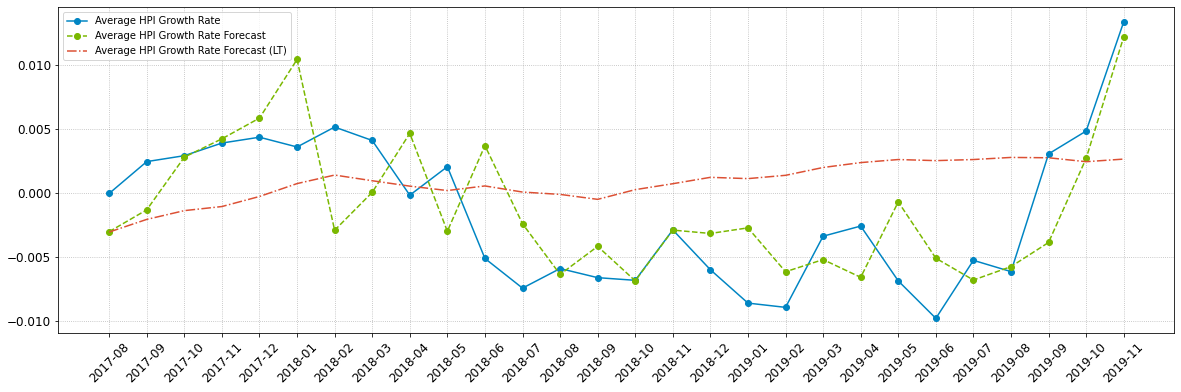

In [286]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.signal import savgol_filter

date_frame= pd.DataFrame(agg['Description'].loc[('2019-12'>agg['Description']) & (agg['Description']>'2001-12')].reset_index(drop = True))
x = date_frame[-nobs:]['Description']
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034'
y = df_results['forecast']
y2 = df_test['mean'][-nobs:]
y3 = savgol_filter(df_results_lt['meanforecast'],5,3)
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.plot(x, y2, marker='o', color=color1, label= 'Average HPI Growth Rate')
ax.plot(x, (4*y)/5, marker='o',ls='--', color=color2, label='Average HPI Growth Rate Forecast')
ax.plot(x, ((4*y3)/5),ls='-.',color=color3, label= 'Average HPI Growth Rate Forecast (LT)')

ax.grid(ls=':', color='gray', alpha=0.6)

ax.legend(loc='upper left', fontsize=10)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)



In [241]:
df_results_lt['meanforecast']

187   -0.003809
188   -0.002759
189   -0.001530
190   -0.001349
191   -0.000838
192    0.001431
193    0.001430
194    0.001450
195    0.000366
196    0.000342
197    0.000343
198    0.000877
199   -0.001235
200    0.000330
201   -0.000564
202    0.001402
203    0.001506
204    0.001153
205    0.001814
206    0.002372
207    0.003076
208    0.003124
209    0.003292
210    0.003007
211    0.003565
212    0.003550
213    0.002937
214    0.003307
Name: meanforecast, dtype: float64

In [ ]:
import os

path = r'./CensusPost' 


Filenames = os.listdir(path)
DataFrameDict_xlsxpost = {elem : pd.DataFrame for elem in Filenames}

for file in os.listdir(path):
    if file.endswith(".xlsx"):
        DataFrameDict_xlsxpost[file] = pd.read_excel(os.path.join(path, file),header = 8)

DataFrameDict_xlsxpost['AGEP2006.xlsx']  = pd.read_excel(os.path.join(path,'AGEP2006.xlsx') ,header = 9)
DataFrameDict_xlsxpost['AGEP2011.xlsx']  = pd.read_excel(os.path.join(path,'AGEP2011.xlsx') ,header = 9) 
DataFrameDict_xlsxpost['AGEP2016.xlsx']  = pd.read_excel(os.path.join(path,'AGEP2016.xlsx') ,header = 9) 

DataFrameDict_xlsxpost['INCP2006.xlsx'].columns.values[[3,4,5,6,7,8,9,10,11,12,13,14,15]]= tuple(['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11','L12','L13'])
DataFrameDict_xlsxpost['INCP2011.xlsx'].columns.values[[3,4,5,6,7,8,9,10,11,12,13,14,15]]= tuple(['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11','L12','L13'])
DataFrameDict_xlsxpost['INCP2016.xlsx'].columns.values[[3,4,5,6,7,8,9,10,11,12,13,14,15,16]]= tuple(['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11','L12','L13','L14'])


In [ ]:
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        df = DataFrameDict_xlsxpost[file].drop(columns=DataFrameDict_xlsxpost[file].columns[0], axis=1)
        df = df.drop(index=df.index[0], axis=0)
        df.columns.values[0] = 'postcode'
        df['postcode'] =  df['postcode'].str.extract(r'^(\d{4})', expand=False)
        DataFrameDict_xlsxpost[file] = df.dropna()
        

In [ ]:
#os.listdir(path)
#Using Census2016 to illustrate 

In [ ]:
DataFrameDict_xlsxpost['LFSP2016.xlsx']
 

In [ ]:
DataFrameDict_xlsxpost['MSTP2016.xlsx']

In [ ]:
DataFrameDict_xlsxpost['CITP2016.xlsx']

In [ ]:
DataFrameDict_xlsxpost['QALLP2016.xlsx']

In [ ]:
DataFrameDict_xlsxpost['AGEP2016.xlsx']

In [ ]:
DataFrameDict_xlsxpost['DWTD2016.xlsx']

In [ ]:
DataFrameDict_xlsxpost['INCP2016.xlsx']

In [ ]:
import numbers
variablenames = []
for key0 in DataFrameDict_xlsxpost.keys():
    if key0.endswith(".xlsx"):
        variablenames.extend(DataFrameDict_xlsxpost[key0].columns.values)


set(variablenames)

vnamesremained = []
for names in set(variablenames):
    if variablenames.count(names)==3:
        vnamesremained.append(names)

vnamesremained       

In [ ]:
import re
paneldatapostal = pd.DataFrame(columns = vnamesremained )
paneldatapostal =paneldatapostal.astype(float, errors = 'raise')
paneldatapostal['date'] = ['2006-07-01','2011-07-01','2016-07-01']
cols = paneldatapostal.columns.tolist()
cols = cols[-1:] + cols[:-1]
dftmp = pd.DataFrame(paneldatapostal[cols])
dftmp.info()

In [ ]:
DataFrameDict_pcarea = {elem : pd.DataFrame for elem in UniquePostcode}
postlists = []
for key in DataFrameDict_pcarea.keys():
    df = dftmp.copy()
    for key0 in DataFrameDict_xlsxpost.keys():
         if key0.endswith(".xlsx"):
                year = re.findall(r'\d+', key0)[0]
                for names in DataFrameDict_xlsxpost[key0].columns.values:
                    if names in vnamesremained:
                        if int(key) in DataFrameDict_xlsxpost[key0]['postcode']:
                            strtmp = DataFrameDict_xlsxpost[key0].loc[DataFrameDict_xlsxpost[key0]['postcode']==key,names].to_string()
                            if len(re.findall("\d+\.\d+", strtmp))>0:
                                fltmp =float(re.findall("\d+\.\d+", strtmp)[0])
                                df.loc[df['date']==f'{year}-07-01', names] =fltmp
                                if df.isnull().sum().sum()==0:
                                    DataFrameDict_pcarea[key] =df
                                    postlists.append(key)



In [ ]:
postlists 

In [ ]:
# extendedDataFrame
extendedDF =  dftmp.copy()
for key in DataFrameDict_pcarea.keys():
    if key in postlists: 
        extendedDF = pd.concat([extendedDF, DataFrameDict_pcarea[key]], ignore_index=True, sort=False)
extendedDF= extendedDF.iloc[3: , :]


In [ ]:
#extended dataframe to build covariance matrix on the postcode-level
extendedDF 

In [ ]:
matrixpos = extendedDF.corr().round(2)

X_train = extendedDF.loc[:, extendedDF.columns != 'date']
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca_d =  PCA(n_components=d)
pca_d.fit(X_train)
X_pca_d = pca_d.transform(X_train)
pcadf = pd.DataFrame(X_pca_d,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [ ]:
# problem: only three years of census data available
# HILDA data application processing is in progress (replace census data)